#  6. Decision Trees

Decision trees are very powerful algorithms and can be used in both classification and regerssion tasks. They are also a main component in random forrest algorithms. Regularization is an import aspect for this type of algorithms since they are prone to overfit.

In [94]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["figure.dpi"] = 120
plt.style.use('ggplot')


##  6.1 Training and Visualizing a Decision Tree

The libraray `graphviz dot` is for saving figures in a description language. In terms of inspecting results quickly for exploraty analysis, `plot_tree` function is more convenient.

```python
    # This exports the image into a graph description language "dot"
    export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True,
    )
```

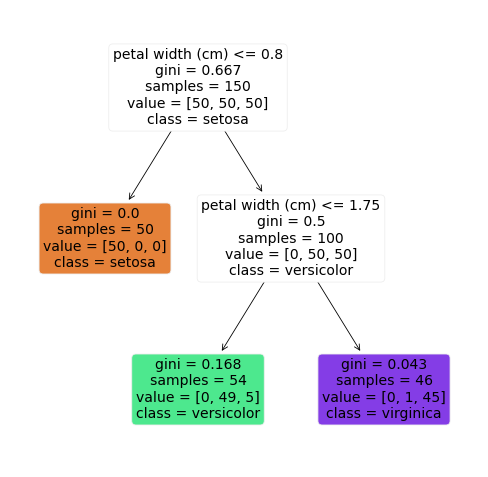

In [75]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz, plot_tree
import graphviz

iris = load_iris()
X = iris.data  # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(criterion="gini", max_depth=2)
tree_clf.fit(X, y)


plot_tree(
    tree_clf,
    feature_names=iris.feature_names[:],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
)
plt.show()


##  6.2 Making Predictions

Decision trees do not require much data preprocessing regarding scaling and so on. The attribute `gini` measures the impurity of node and calculated as follows:

$$  G_{i} = 1 - \sum_{k=1}^{K} P_{i,k}, \text{Gini constant } $$
$$  G_{i} = 1 - \sum_{k=1}^{K} \frac{values[k]}{samples}  $$

Higher the gini constant the more diverse the sample is. 

> **Remark :** There is a quick recap about black and white box models. The main argument is that we can easily interpret our prediction based on features. However, this field is a little more complicated and nuanced escpecially latest research focus on fairness.


##  6.3 Estimating Class Probabilities

Class probabilities are $P_{i,k}$'s shown in gini constant calculations. To predict a new data point's class, we first traverse through nodes and find the leaf. And then the class with the highest probability is chosen as an output.

##  6.4 CART Training Algorithm

Expansion of CART acronym is *Classification and regression tree* such that it's used for training decision tree algorihtms. This is a greedy algorithm meaning optimal solution is not guraanteed. Dataset is split into a two subset based on a feature. Loss function is as follows:

$$ J(k, t_{k}) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right} $$





##  6.5 Computational Complexity

Using big O notation training and prediction goes like this:
- Training: $O(n \times m log(m))$
- Predicting $O(log(m))$

##  6.6 Gini Impurity or Entropy 

Two criteria can be used in training decision trees: gini or entropy impurity. In short, entropy is the average information content of a message (random variable) and can be calclulated as such $ H[X] = - \sum_{x \in X} p(x) \times log~p(x)$. Both approach tend to produce similar results. However, gini isolates the most frequent class and entropy generates more balanced tree.

##  6.7 Regularization Hyperparameters

Decision trees are nonparametric models meaning the number of parameters change with given dataset. They are not decided for the model beforehand. That's why it's easy to overfit a decision tree model.

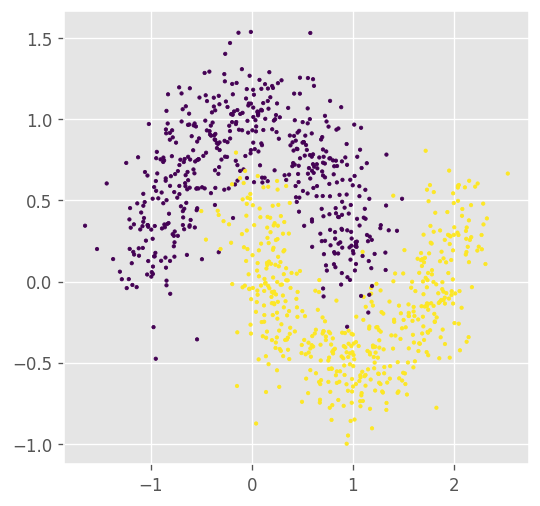

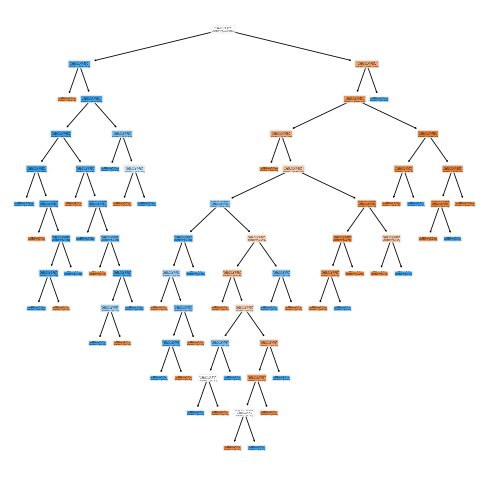

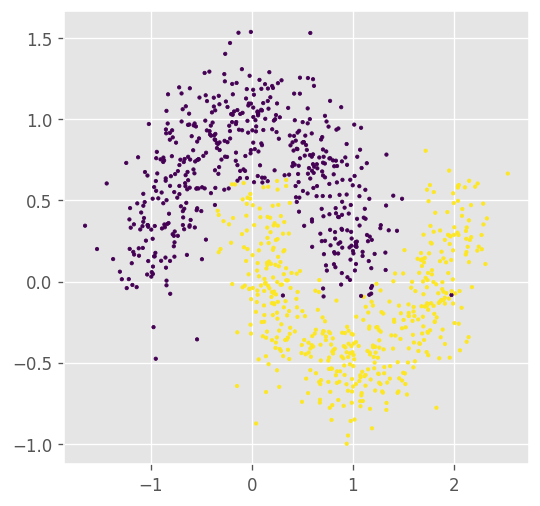

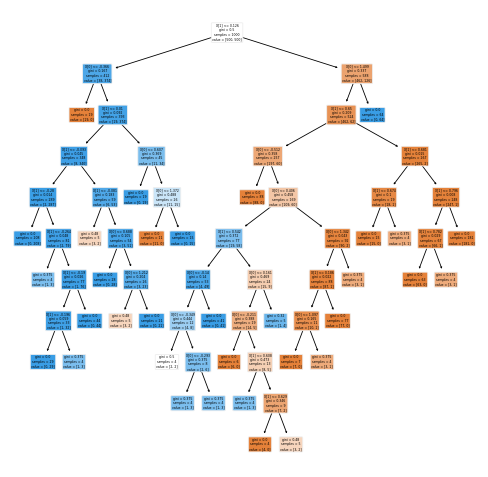

In [44]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.2)

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X, y)
preds = clf_tree.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=preds, s=4)
plt.show()
plot_tree(
    clf_tree,
    rounded=True,
    filled=True,
)
plt.show()

clf_tree_reg = DecisionTreeClassifier(min_samples_leaf=4)
clf_tree_reg.fit(X, y)
preds = clf_tree_reg.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=preds, s=4)
plt.show()
plot_tree(
    clf_tree_reg,
    rounded=True,
    filled=True,
)
plt.show()
plt.show()


##  6.8 Regression

In regression setting, CART predicts mean value for the given data point instead of class. In addition, loss function uses mean squared error rather than impurity metrics. Similar to classification task, regression model is prone to overfitting if not limited with a regularization approach.

$$ J(k, t_{k}) = \frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m} MSE_{right} $$

$$ MSE_{node} = \sum_{i \in node} (\hat{y}_{node} - y^{(i)})^{2} $$
$$ \hat{y}_{node} = \frac{1}{m_{node}} \sum_{i \in node} y^{(i)} $$

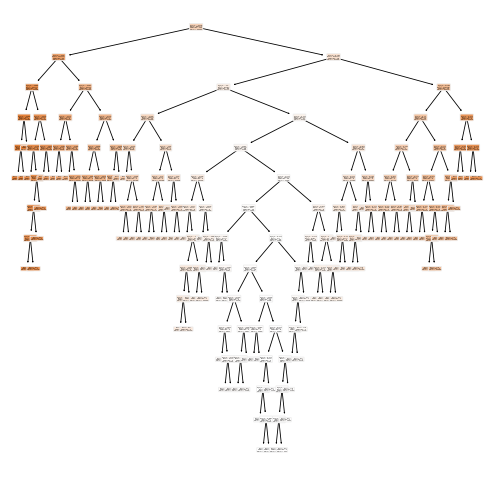

 RMSE: 0.0


In [71]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = np.random.uniform(-5, 5, 100).reshape(-1,1)
y = (3 * X ** 2 - X + np.random.normal(0, 1)).reshape(-1,1)
plt.scatter(X, y, s=4)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)
preds = tree_reg.predict(X)

plot_tree(tree_reg,rounded=True,filled=True)
plt.show()

print(f" RMSE: {np.sqrt(mean_squared_error(y,preds))}")


##  6.9 Instability

Decision trees have perpendicular decision boundaries and they are rather sensible to small changes in dataset. That's why this type of model might have harder time in generalizing. One solution is to use principal component analysis for dimensionality reduction. 


## Exercises

1. Approximate depth is $log_{2} (m)$, so for 1,000,000 data points average depth is 20. 
2. Lower because smaller gini means more pure results and this is the main goal of the algorithm.
3. Yes, decreasing `max_depth` also decreases the model capacity and permits overfitting.
4. No, feature scaling is not important for decision trees.
5. 10 hours, training is linearly proportional to instances. $O(n \times m \times log(m))$
6. No, to many data points.

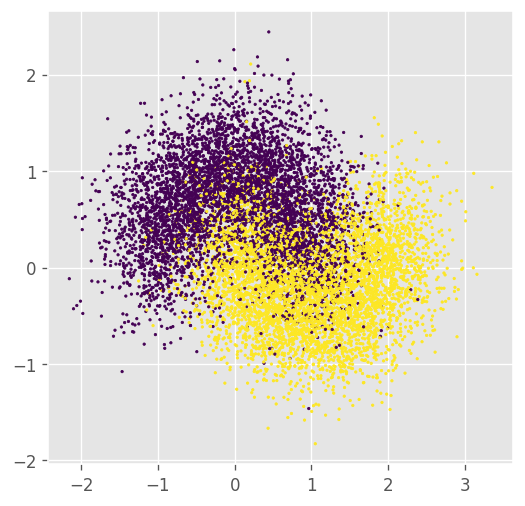

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013146,0.001544,0.001078,0.000057,gini,4,2,"{'criterion': 'gini', 'max_depth': 4, 'max_lea...",0.770,0.7685,0.7685,0.7715,0.769625,0.001244,49
1,0.020242,0.004815,0.001346,0.000054,gini,4,4,"{'criterion': 'gini', 'max_depth': 4, 'max_lea...",0.851,0.8475,0.8515,0.8485,0.849625,0.001672,1
2,0.014281,0.001328,0.001624,0.000738,gini,4,6,"{'criterion': 'gini', 'max_depth': 4, 'max_lea...",0.851,0.8475,0.8515,0.8485,0.849625,0.001672,1
3,0.012784,0.000763,0.001047,0.000083,gini,4,8,"{'criterion': 'gini', 'max_depth': 4, 'max_lea...",0.851,0.8475,0.8515,0.8485,0.849625,0.001672,1
4,0.006888,0.000339,0.001133,0.000289,gini,6,2,"{'criterion': 'gini', 'max_depth': 6, 'max_lea...",0.770,0.7685,0.7685,0.7715,0.769625,0.001244,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.018453,0.000618,0.000964,0.000033,entropy,16,8,"{'criterion': 'entropy', 'max_depth': 16, 'max...",0.851,0.8475,0.8395,0.8485,0.846625,0.004307,25
60,0.009529,0.000695,0.000912,0.000044,entropy,18,2,"{'criterion': 'entropy', 'max_depth': 18, 'max...",0.770,0.7685,0.7535,0.7715,0.765875,0.007223,57
61,0.014468,0.001137,0.001286,0.000336,entropy,18,4,"{'criterion': 'entropy', 'max_depth': 18, 'max...",0.851,0.8475,0.8395,0.8485,0.846625,0.004307,25
62,0.020590,0.001201,0.001013,0.000032,entropy,18,6,"{'criterion': 'entropy', 'max_depth': 18, 'max...",0.851,0.8475,0.8395,0.8485,0.846625,0.004307,25


In [90]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


X, y = make_moons(n_samples=10000, noise=0.4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=2)
plt.show()

tree_clf = DecisionTreeClassifier()

params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [depth for depth in range(4, 20, 2)],
    "max_leaf_nodes": [leaf for leaf in range(2, 10, 2)],
}

search = GridSearchCV(estimator=tree_clf, param_grid=params, n_jobs=-1, cv=4)
search.fit(X_train, y_train)


In [93]:
results = pd.DataFrame(search.cv_results_)
results.sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
31,0.011297,0.000424,0.001015,0.000021,gini,18,8,"{'criterion': 'gini', 'max_depth': 18, 'max_le...",0.851,0.8475,0.8515,0.8485,0.849625,0.001672,1
30,0.010541,0.000877,0.000965,0.000069,gini,18,6,"{'criterion': 'gini', 'max_depth': 18, 'max_le...",0.851,0.8475,0.8515,0.8485,0.849625,0.001672,1
29,0.008998,0.001180,0.001121,0.000252,gini,18,4,"{'criterion': 'gini', 'max_depth': 18, 'max_le...",0.851,0.8475,0.8515,0.8485,0.849625,0.001672,1
27,0.011299,0.000459,0.001040,0.000048,gini,16,8,"{'criterion': 'gini', 'max_depth': 16, 'max_le...",0.851,0.8475,0.8515,0.8485,0.849625,0.001672,1
26,0.011390,0.001600,0.001120,0.000233,gini,16,6,"{'criterion': 'gini', 'max_depth': 16, 'max_le...",0.851,0.8475,0.8515,0.8485,0.849625,0.001672,1


In [95]:
from sklearn.metrics import f1_score, accuracy_score
clf = search.best_estimator_
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accuracy = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)
print(f"Accuracy: {accuracy}\nf1: {f1}")


Accuracy: 0.851
f1: 0.8524752475247525


In [121]:
from sklearn.model_selection import ShuffleSplit
clf = search.best_estimator_
sp = ShuffleSplit(n_splits=1000, train_size=100)
accuracies = []
pred_votes = np.zeros((y_test.shape[0], 1000))

for index, (train_index, _) in enumerate(sp.split(X_train)):
    clf.fit(X_train[train_index], y_train[train_index])
    preds = clf.predict(X_test)
    pred_votes[:,index] = preds


In [151]:
from scipy.stats import mode
voted_results = mode(pred_votes, axis=1)[0].astype(int)
1 - (voted_results.reshape(1,-1) ^ y_test).sum() / len(y_test)

0.851